<a href="https://colab.research.google.com/github/Armestrong/Fraudes_em_cartoes_de_credito/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Armestrong/Fraudes_em_cartoes_de_credito/blob/master/img/CARTAO.jpg?raw=true"></p>

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="http://sigmoidal.ai/wp-content/uploads/2019/12/54.jpg" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [2]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q scikit-plot
import scikitplot as skplt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

#configurando o estilo dos graficos do seanborn
sns.set_style('dark')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [0]:
# importar os dados para um dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

#01 - ANALISE INICIAL


Como primeiro passo, eu custumo analisar com que tipo de `dataset` estou lidando, quais os dados e o tamanho deles, e para isso vamos dar uma explorada e descobrir os **valores**, **colunas** e **tamanho**


Para isso utilizaremos os metodo:


* `head` para vizualizarmos as primeiras 5 linhas.
* `shape` para descobrirmos o tamanho de Entrada e Variaveis.
* `dtypes` para descrobrirmos os tipos de dados.

In [0]:
# 5 primeiras entradas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# Tamanho do nosso dataset
print("Entradas - Linhas :\t{}".format(df.shape[0]))
print("Variaveis - Colunas :\t{}\n".format(df.shape[1]))
print("---- TIPOS DE DADOS ----")
# Tipos de dados do nosso dataset
print(df.dtypes)

Entradas - Linhas :	284807
Variaveis - Colunas :	31

---- TIPOS DE DADOS ----
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


#02 - DICIONARIO



Logo após eu analisar rapidamente meu `dataset`, crio um dicionario para poder saber exatamente para que ser cada tipo de dado, classificando-os em:

*  Numericas : chave-primaria, discrestas **int** & continuas **float**.
*  Categoricas **string**

`- melhor explicação nesse ` [link ](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/)

**dicionario do dataset**
* NUMERICAS
  * Chave primaria
    * `/` - ///
  * Discretas **int**
    * `Class` - Tipo de transação
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
  * Continuas **float/double**
    * `Time` - Tempo da transação em segundos
    * `Amount` - Valor da transação
    * `V1 ao V28` - PCA transformation
  * Categoricas **string**
    * `/` - /// 
  * Dataset **Tamanho**
    * `Entrada` - 284807
    * `Variaveis` - 31  

#03 - ANALISE EXPLORATORIA

Agora vamos analisar todo nosso `dataset` para podermos começar a tirar insights dele, *mas que analise devemos fazer ?*. Existem alguns metodos e graficos que podem nos dar um norte.

Esses metodos & graficos são:


* `describe` para termos um resumo estatistico do dataset.
* `isnull` para sabermos se há valores nulos.
* `distplot` para plotarmos um grafico e vermos o balanceamento do dataset.
* `histplot` para plotarmos um grafico e compararmos as variavel `Time` e `Amount` em coesão a variavel `Class`.
* `boxplot` para plotarmos um grafico e descobrirmos se há valores discrepantes.
* `heatmap` para plotarmos um grafico e descobrir se há algum correlação entre os dados.
* `kdeplot` para idenficar anomalias.

Bom, aparentemente esse monte de metodo e plotagem de graficos são apenas informações soltas, certo? Então vamos dar uma logica a tudo isso.

**Primero**

Vamos ver as informaçoes estatisticas e vermos oque pode estar acontecendo com os dados.

In [0]:
# Descrição estatistica do dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Huun .. Aparentimente há um monte de informação que talvez não me seja util no momento, então vamos dar uma penerada e pegarmos aqueles que possa, me dar algum informação util.

Então vamos escolher a variavel `Amount` e `Class`.

Obs.: Aparentemente o `Time` tem informaçoes relevantes, mas ele representa apenas o tempo de cada transação feita, então podemos descartalo neste momento.

In [0]:
# Descrição estatistica de Time, Amount e Class

df[['Amount','Class']].describe()

,Amount,Class
count,284807.000000,284807.000000
mean,88.349619,0.001727
std,250.120109,0.041527
min,0.000000,0.000000
25%,5.600000,0.000000
50%,22.000000,0.000000
75%,77.165000,0.000000
max,25691.160000,1.000000


**uma descrição rapida para melhor entendimento**
* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão
* **min** - menor valor da coluna
* **25%** - percentil 25
* **50%** - percentil 50 (e mediana)
* **75%** - percentil 75
* **max** - maior valor da coluna

Bom se percebermos na coluna (variavel) `Amount`, o valor medio de compra é de 88.34 euros mas seu desvio padrão é de 250.120 , e sua compra mais cara foi de 25691 euros

Geralmente esse desvio padrão alto seria como se tivessemos um restarante
e o valores de cada prato seria: 10, 2000, 40, 300, 25691, bem quebrado esses valores, não é mesmo? então essa media não parece tão concreta, porém, como se trata de valores de **compras** de qualquer coisa, sem restriçoes, então era esperado essa discrepancia, pelo menos inicialmente. Mas como estamos tratando de valores que podem ter sido fraudulentos, vamos analisar essa estatistica de forma diferente.

**Resumo estatistico da Quantidade em relação a compras sem fraudes = 0**


In [0]:
###############
df[['Amount','Class']][df['Class'] == 0].describe()

,Amount,Class
count,284315.000000,284315.0
mean,88.291022,0.0
std,250.105092,0.0
min,0.000000,0.0
25%,5.650000,0.0
50%,22.000000,0.0
75%,77.050000,0.0
max,25691.160000,0.0


Aparentimente os resumos estatisticos de compras **sem fraudes** e o resumo **estatico geral** são bem semelhantes, isso se leva em consideração, pois a porcentagem de compras normais é muito maior do que compras fraudulentas, como visto logo abaixo. 

In [0]:
# Verificando o balanceamento das classes
sz = df.Class.value_counts() / df.Amount.count()
print("TOTAL DE COMPRAS:           \t{:0.0000f}".format(df.Amount.count()))
print("COMPRAS NORMAIS    - 0: QTD \t{} - PERCENTUAL \t{:0.1f}%".format(df.Class.value_counts()[0],sz.values[0] / sz.sum() * 100))
print("COMPRAS COM FRAUDE - 1: QTD\t{}    - PERCENTUAL  \t{:0.1f}%\n".format(df.Class.value_counts()[1], sz.values[1] / sz.sum()* 100))


0    0.998273
1    0.001727
Name: Class, dtype: float64

TOTAL DE COMPRAS:           	284807
COMPRAS NORMAIS    - 0: QTD 	284315 - PERCENTUAL 	99.8%
COMPRAS COM FRAUDE - 1: QTD	492    - PERCENTUAL  	0.2%



Como vemos compras **normais** tem controle quase total, mas vamos continuar analisando.

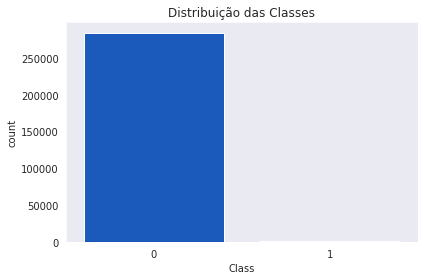

In [180]:
#Plotando grafico de barras para classes
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax, palette='winter')
ax.set_title('Distribuição das Classes')
plt.tight_layout()

**Resumo estatistico da Quantidade em relação a compras sem fraudes = 1**

In [0]:
#resumo estatistico
df[['Amount','Class']][df['Class']== 1].describe()

,Amount,Class
count,492.000000,492.0
mean,122.211321,1.0
std,256.683288,0.0
min,0.000000,1.0
25%,1.000000,1.0
50%,9.250000,1.0
75%,105.890000,1.0
max,2125.870000,1.0


Bom, aqui vemos que compras fraudulentas geralmente tem um valor baixo, 50% das compras realizadas é apenas de 9 euros, e reparando novamente que a media não é condizente.

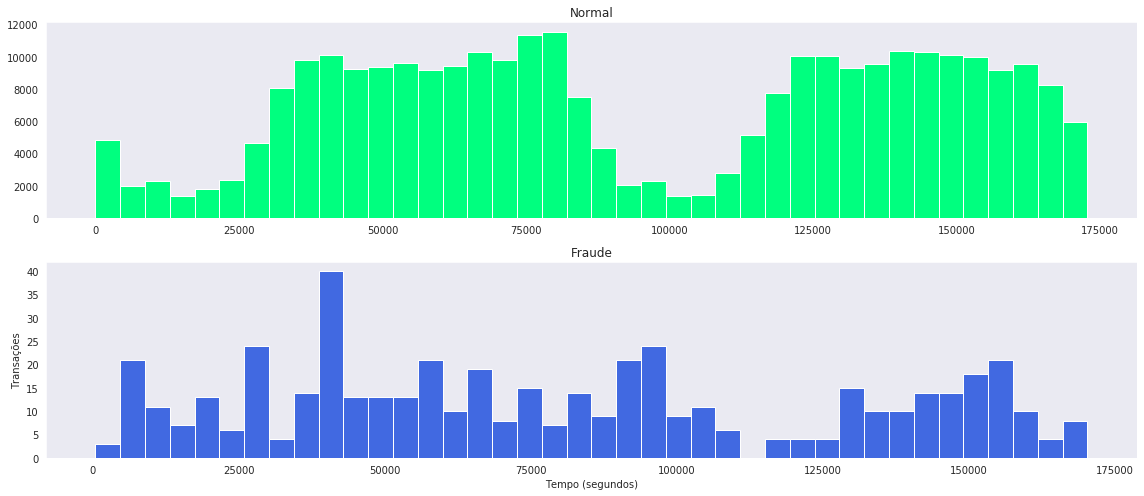

In [185]:
#Plotando grafico de histograma
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16,7))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='springgreen')
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='royalblue')
ax[1].set_title('Fraude')
plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

**Primeiro - Conclusão**

* `Compras Normais`

Possuim a maior parte dos dados, com 99,8%, possuim alguns dados com ruidos então a media pode distorcer.

* `Compras com Fraude`

Não muitas compras fraudulentas, apenas 0,02%, mas conseguimos perceber que elas possuim um valor de compra, "fora do radas", o que facilita a fraude, pois geralmente nós compradores não temos o costume de lembrar coisas relativamente "baratas".

**Segundo**

Continuaremos analisando a variavel `Class`, e nesse cenario vamos utilizar o metodo `boxplot` para sabermos como nossa variavel `Amount` esta distribuida.


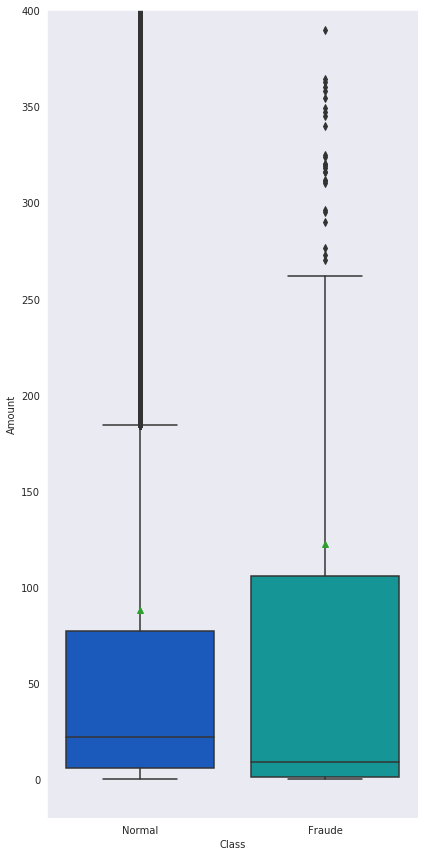

In [178]:
#Plotando boxplot
fig, ax = plt.subplots(figsize=(6,12), sharex=True)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax, palette='winter')
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
plt.tight_layout()

**Terceiro**

Agora na terceira parte iremos ver se há algum valor faltante em nosso dataset, pois isso pode prejudicar nossa consideração final, e como foi mostrado logo acima vamos utilizar o metodo `isnull` para verificar isso.

In [0]:
#Verificando se há valores ausentes no dataset 
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

**Terceiro - Conclusão**

Não há valores ausentes, então com isso podemos eliminar uma preocupação :)


**Quarto**

Para analisarmos a distribuição de cada valor da classe `Amount` em referencia as variaveis `Class`, `V1` ao `V28`, vamos utilizar o grafico de densidade `kdeplot`, que nos auxilia a identificar anomalias mais facilmente.

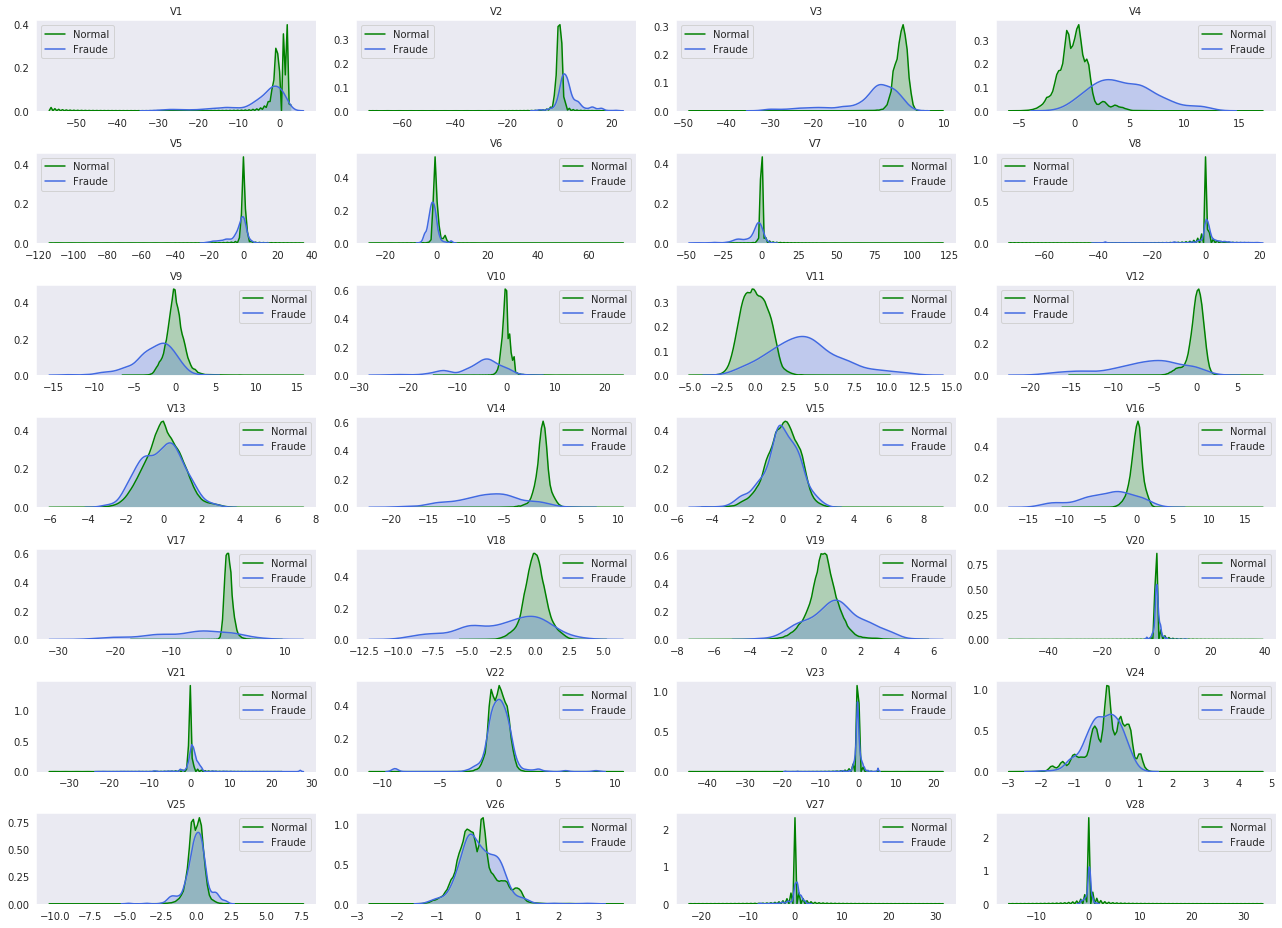

In [165]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,13))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Normal", color='green', shade=True)
    sns.kdeplot(df_class_1[col], label="Fraude", color='royalblue', shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()

**Quarto - Conclusão**

Conseguimos notar que existem alguns conjuntos de dados que se comportao mais semelhantes perante, como: `V1`, `V5`, `V6`, `V7`, `V8`, `V13`, `V15`, `V20`, `V21`, `V22`, `V23`, `V24`, `V25`, `V26`, `V27` e `V28`.



Porém, há algumas que se distinguem, como: `V2`, `V3`, `V4`, `V9`, `V10`, `V11`, `V12`, `V14`, `V16`, `V17`, `V18` e `V19`, e é nessas variaveis que conseguimos identificar mais facilmente fraudes ocorridas em compras. 





**Resumindo parte 03**

Antes de irmos para a preparção de dados, onde vamos organiza-los, distribui-los para mais a frente modelarmos, vamos resumir o que acabamos de analisar.

*  **Primeiro** - Compras normais tomam grande parte dos dados com 99,8% e compras com fraudes apenas 0,2%, e compras fraudadas sempre são em menores valores, dificeis de rastrear e identificar.

*  **Segundo** - Os dados não estão balanceados.

*  **Terceiro** - Não há valores ausentes.

*  **Quarto** - A maioria dos graficos se comportam sem muita distinção, porém a quantidade de graficos que se comportam de maneira distinta não é pequena.



#04 - PREPARAÇÃO DOS DADOS


Nesta etapa vamos preparar os dados que analisamos. Bom você pode estar se perguntado, preparar oque? e pra que?

Bom, como visto no começo, esse é um projeto para identificar quando compras foram fraudadas ou não, e para isso precisamos preparar nosso dados, pois como visto na parte de **analise exploratoria**, nosso dados estão desbalanceados, e e para criar um modelo de machine learn com uma precisam confiavel precisamos ter dados que correspondam para o treinamento.

Para essa etapa temos 2 passos importantes.
* `Padronizar os dados` - Essa tecnica tem como objetivo transformar todas as variaveis na mesma ordem de grandeza.
* `Train & Test` - Separar o dataset entre treino e teste.
* `Balancearmos os dados` - A fim de evitar uma baixa performance para a `classe == 1 (fraude)` e overfitting.

**Primeiro**

Bom nessa etapa vamos padronizar a variavel `Amount` e `Time`, que possuem *Outliers*(desvio padrao) e utilizaremos o classe *StandardScaler*.



In [6]:
# Fazendo uma copia do Dataset
df_new = df.copy()

# Criando um objeto para a classe StandardScaler()
std_scaler = StandardScaler()

# Colocando um novas colunas/Series Time e Amount
df_new['std_amount'] = std_scaler.fit_transform(df_new['Amount'].values.reshape(-1,1))
df_new['std_time'] = std_scaler.fit_transform(df_new['Time'].values.reshape(-1,1))

# Retirando as antigas colunas Time e Amount
df_new.drop(['Time','Amount'], axis=1, inplace=True)

# output das 5 primeiras linhas
df_new.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**Segundo**

Bom, provavelmente se voce ja mexeu com algum projeto de DS com machine learn ou viu algum, sempre ha dois tipos de arquivo, um de treino `train` e `test`.
* `Train` - Tem o objetivo de treinar seu modelo, todos tipos de modificaçao, remosão etc, voce realiza nele.
* `Test`  - É o nosso dataset bruto, que utilizaremos como parametro de comparaçao quando tivermos ja treinado nosso dataset de treino `train`, para nao haver nenhum tipo de dado com vies, e verificarmos se o modelo esta adequado

Para isso vamos utilizar uma a funçao `train_test_split`, que tem alguns parametros que nos seram uteis, como:
O primeiro mantém a mesma proporção de valores para as categórias da variável alvo, ou seja, no conjunto de treino e teste haverá a mesma proporção de compras fraudulentas em relação ao total de compras. 

* stratify - Mantem a mesma proporção para as entradas da varivel dependente no treino e teste.
* shuffle - Mistura as entradas antes de separa-las.

In [0]:
##Separ os dados entre X e y###

#dropando a Variavel Class da variavel X
X = df_new.drop('Class', axis=1)

#Inserindo somente uma variavel na variavel y
y = df['Class']

# Dividir os dados etre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)


**Terceiro**

Agora para balancearmos os dados iremos usar a lib `imblearn` que nos facilita o balanceamento dos dados, essa bliblioteca contem 2 tipos de metodos.

* `over_sampling` - Duplica as observaçoes da classe minoritaria para balancear o dataset.
* `under_sampling` - Dropa observaçoes da classe majoritaria para balancear o dataset.

Bom, como nosso dataset contem uma discrepancia entre valores `normais` e `fraudes`, Inserir novos valores poderia nos dar uma modelagem nao tao adeguada, entao nesse caso usaremos `under_sampling`.


In [9]:
from imblearn.under_sampling import RandomUnderSampler

#Utilizando o funçao under_samping
rus = RandomUnderSampler();
X_rus, y_rus, = rus.fit_sample(X_train,y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
#  Mostrar valores
print("Compras Fraudulentas - 1: \t{} ".format(pd.Series(y_rus).value_counts()[0]))
print("Compras Normais      - 0: \t{} ".format(pd.Series(y_rus).value_counts()[1]))


Compras Fraudulentas - 1: 	369 
Compras Normais      - 0: 	369 


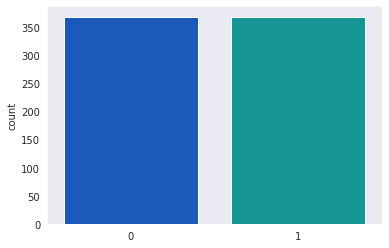

In [171]:
# plotar a nova distribuição de classes
sns.countplot(y_rus, palette='winter');

**Quarto**

Agora vamos plotar uma matriz de correlação e vermos como os dados estavam antes e depois de serem balanceados.

obs.: Como o proprio nome diz, mapa de correlaçao, ele nos da a possibilidade de obeservar o quanto as variaveis tem mais relação entre si com `heatmap`
Quanto maior o valor `1.00` maior a correlaçao, quanto menor a correlaçao `0.75` menor a relaçao entre as variaveis.

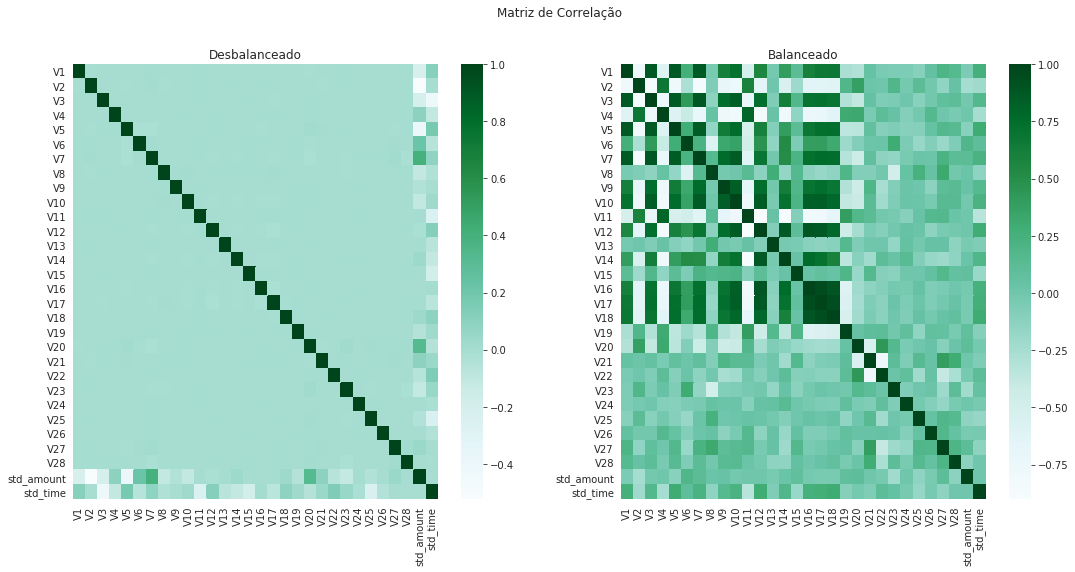

In [173]:
# Criar correlação desbalanceada
corr = X_train.corr()

# Criar correlação balanceada
corr_rus = pd.DataFrame(X_rus).corr()

# Plotar matriz de correlação
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.0, cmap="BuGn", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.0, cmap="BuGn", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()



**Resumindo parte 04**

* **Primeiro** - Padronizamos nossas variveis `Time` e `Amount` para poderem ter a mesma ordem de grandeza.
* **Segundo** - Separamos nosso dataset entre treino e teste com a funçao `train_test_split`.
* **Terceiro** - Vimos que utilizar `under-sampling` era a melhor opçao para nossa analise e tornamos as entradas das variaveis `0 - Normal`  e `1 - Fraude` equivalentes.
* **Quarto** - Plotamos um grafico de correlaçao `heatmap` para termos uma melhor visualizaçao do antes e depois dos dados balanceados e analisarmos as correlaçoes entre as variaveis mais claramente.

#05 - MODELOS DE MACHINE LEARN


Agora que ja fizemos nossa analise exploratoria, preparamos nossos dados, vamos montar um modelo de regressao logistica, pois nosso modelo tem como variavel depentente valores classificatorios, `0 - normal` &  `1 - fraude`. 

Temos alguns passos a tomados:

* `Instanciar e  treinar`
* `Fazer previsoes` 



In [0]:
# Instanciar e treinar um modelo de regressao logistica

model = LogisticRegression()
model.fit(X_rus,y_rus)

#Fazer as previsoes utlizando os dados de teste que nao foram alterados

y_pred = model.predict(X_test)
x_proba = model.predict(X_test)

#06 - DESEMPENHO DO MODELO

Logo após treinar e fazer as previsoes com os dados, temos que avaliar o desempenho do mesmo, para isso temos alguns pontos a prestarmos atenção. 

Na etapa de analise exploratoria vimos que a quantidade de dados pertencentis a categoria `0 - normal` era muito superior a `1 - fraude`, e isso poderia afetar detecçao de fraude, exemplificando, seria como identificar quais dos 2 gemeos gostam de maça sem conhece-los ou ter **dados** sobre eles, então quanto mais eu ter a mesma quantidade de dados de ambos, mais precisa pode ser minha detecção.

artigo que explica melhor sobre balanceamento de dados e sua importancia [link](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/).

Bom, oque precisamos observar para saber se nosso detecção de fraude esta boa é:

* `precision` - A precisão diz respeito à quantidade (proporcional) de identificações positivas feita corretamente
* `accuracy` - Mostra quantas previsões o modelo acertou em relação a todas que seriam possíveis.
* `recall` - Mostra a proporção de positivos encontrados corretamente.
* `f1-score` - É a média harmonica entre precisão e recall. O melhor valor possível para 0 f-score é 1 e o pior é 0.
* `AUC` - ou [AUC ROC](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772) Avalia a eficiencia da modelo.



Relatorio de classificaçao:
               precision    recall  f1-score   support

           0     0.9999    0.9609    0.9800     71079
           1     0.0397    0.9350    0.0762       123

    accuracy                         0.9609     71202
   macro avg     0.5198    0.9479    0.5281     71202
weighted avg     0.9982    0.9609    0.9784     71202

Acuracia: 0.9609

AUC: 0.9479



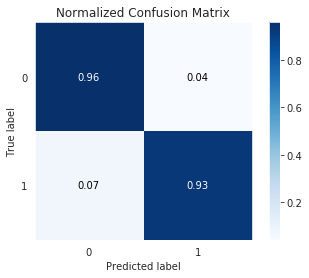

In [177]:
#Plotar a matrix de confusao
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

#Imprimir relatorio de classifiação
print("Relatorio de classificaçao:\n", classification_report(y_test, y_pred, digits=4))

#Imprimir a acuracia do modelo
print("Acuracia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

#Imprimir a area sob da curva
print("AUC: {:.4F}\n".format(roc_auc_score(y_test, y_pred)))

**explicação Modelo de Classificação**

Usarei um exemplo para aqueles que ainda não conhecem o modelo de classificação, possam entender de forma clara:

* **Verdadeiro positivo (*true positive* — TP):**

 Você previu positivo e é verdadeiro

  * *Você previu que a mulher **esta gravida**, e ela realmente **esta**.*

* **Falso verdadeiro (*true negative* — TN)**: 

  Você previu negativo e é verdadeiro.

  * Você previu que o homem **não esta gravido**, e ele **realmente não esta**.

* **Falso positivo (*false positive* — FP — Type 1 Error):**

 Você previu positivo e é falso. 

  * Você previu que o **homem esta gravido**, e ele na verdade **não esta.**

* **Verdadeiro negativo (*false negative* — FN — Type 2 Error):** 

 Você previu negativo e é falso. 

  * Você previu que a mulher **não esta gravida** mas ela na verdade **esta**.

  ![alt text](https://miro.medium.com/max/462/1*7EYylA6XlXSGBCF77j_rOA.png)


# CONCLUSÃO


Apesar do dataset estar compacto, sem valores ausentes ou variáveis categóricas, foi preciso tratar os dados, pois a discrepância entre compras normais e fraudulentas era grande, que iria acabar criando um bom modelo para identificar compras normais, e compras com fraudes acabaria passando sem ser notadas, e acarretaria em um grande prejuízo para a empresa, mas conseguimos construir um bom modelo para identifica-los.

**Observação**

Como foi analisado no nosso dataset, compras fraudadas tem uma característica que é o valor baixo de compra, então lembrei de algumas noticias de li que se encaixam na característica citada, que são transações atípicas, que por muitas vezes são realizar pelos próprios filhos em jogos online, uma rápida pesquisa no Google e você encontra, *Garoto de 10 anos gasta mais de R$ 6.000 em Fortnite e deixa mãe no vermelho*, *'Meus filhos esvaziaram nossa conta bancária jogando Fifa'* entre outras. O ponto que quero colocar é que por muitas vezes o problema esta mais perto do que imaginamos, e fazer compras online é algo realmente muito simples de ser fazer.